  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Predicting whether the cancer is benign or malignant
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The objective of the dataset is to predict whether Predict whether the cancer is benign or malignant

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



## Data Definition:

Input variables:

1) **id** (id number)


2) **radius_mean:** mean of distances from center to points on the perimeter


3) **texture_mean:** standard deviation of gray-scale values


4) **perimeter_mean:** mean size of the core tumor


5) **area_mean:** has housing loan? (categorical: 'no','yes','unknown')


6) **smoothness_mean:** mean of local variation in radius lengths


7) **compactness_mean:** mean of perimeter^2 / area - 1.0


8) **concavity_mean:** mean of severity of concave portions of the contour


9) **concave points_mean:** mean for number of concave portions of the contour


10) **symmetry_mean:** 


11) **fractal_dimension_mean:** mean for "coastline approximation" - 1



12) **radius_se:** standard error for the mean of distances from center to points on the perimeter


13) **texture_se:** standard error for standard deviation of gray-scale values


14) **perimeter_se:** 


15) **area_se:**


16) **smoothness_se:** standard error for local variation in radius lengths


17) **compactness_se:** standard error for perimeter^2 / area - 1.0


18) **concavity_se:** standard error for severity of concave portions of the contour


19) **concave points_se:** standard error for number of concave portions of the contour


20) **symmetry_se:** 


21) **fractal_dimension_se:** standard error for "coastline approximation" - 1


22) **radius_worst:** "worst" or largest mean value for mean of distances from center to points on the perimeter


23) **texture_worst:** "worst" or largest mean value for standard deviation of gray-scale values


24) **perimeter_worst:**


25) **area_worst:** 


26) **smoothness_worst:** "worst" or largest mean value for local variation in radius lengths


27) **compactness_worst:** "worst" or largest mean value for perimeter^2 / area - 1.0


28) **concavity_worst:** "worst" or largest mean value for severity of concave portions of the contour


29) **concave points_worst:** "worst" or largest mean value for number of concave portions of the contour


30) **symmetry_worst:** 


31) **fractal_dimension_worst:** "worst" or largest mean value for "coastline approximation" - 1


Output variable (desired target):

32) **diagnosis:**  The diagnosis of breast tissues (M = malignant, B = benign)


<a id='import_packages'></a>
## 1. Import Packages

In [20]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# read the data
#raw_data = pd.read_csv('/content/drive/MyDrive/cancer.csv')
raw_data = pd.read_csv('C:\\Users\\arunk\\Downloads\\Intelli\\IntelliDataSciencePython\\PythonDataScience\\1PythonTrainingToUSe\\DoIt\DoIt2\\15_B_EnsembleModel\\Ensemble_Breast cancer classification\\Breast cancer classification\cancer.csv')

# print the first five rows of the data
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
raw_data.shape

(569, 33)

<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [6]:
# check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that <br>
                        1. There is an id that cannot be used for classificaiton <br>
                        2. Diagnosis is our class label<br>
                        3. Unnamed: 32 feature includes NaN so we do not need it<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Removing 'id' and 'Unnamed:32' feature from dataset**

In [7]:
data = raw_data.drop(['id','Unnamed: 32'],axis= 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# get the shape
print(data.shape)

(569, 31)


**We see the dataframe has 31 columns and 569 observations**

Number of Benign:  357
Number of Malignant :  212


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


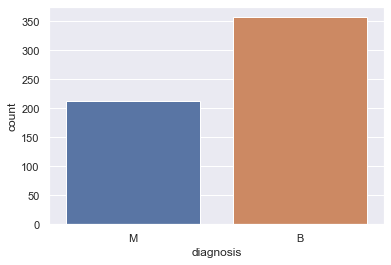

In [11]:
ax = sns.countplot(data['diagnosis'],label="Count")       # M = 212, B = 357
B, M = data['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

#### We see that the data is imbalanced

<a id='Statistical_Summary'></a>
## 3.2 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [12]:
# data frame with numerical features
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# data frame with categorical features
data.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


<a id='Label_Encoding_for_Target_Variable'></a>
## 3.3. Label Encoding for Target Variable


In [14]:
# replace 'M' with zero
data['diagnosis'] = data['diagnosis'].replace('M', 0)
# replace 'B' with one
data['diagnosis'] = data['diagnosis'].replace('B', 1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id='Missing_Data_Treatment'></a>
## 3.4. Missing Data Treatment


In [15]:
# get the count of missing values
missing_values = data.isnull().sum()

# print the count of missing values
print(missing_values)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


There are no missing values present in the data.

<a id='Visualization'></a>
## 3.6. Visualization


**PDF's of features**

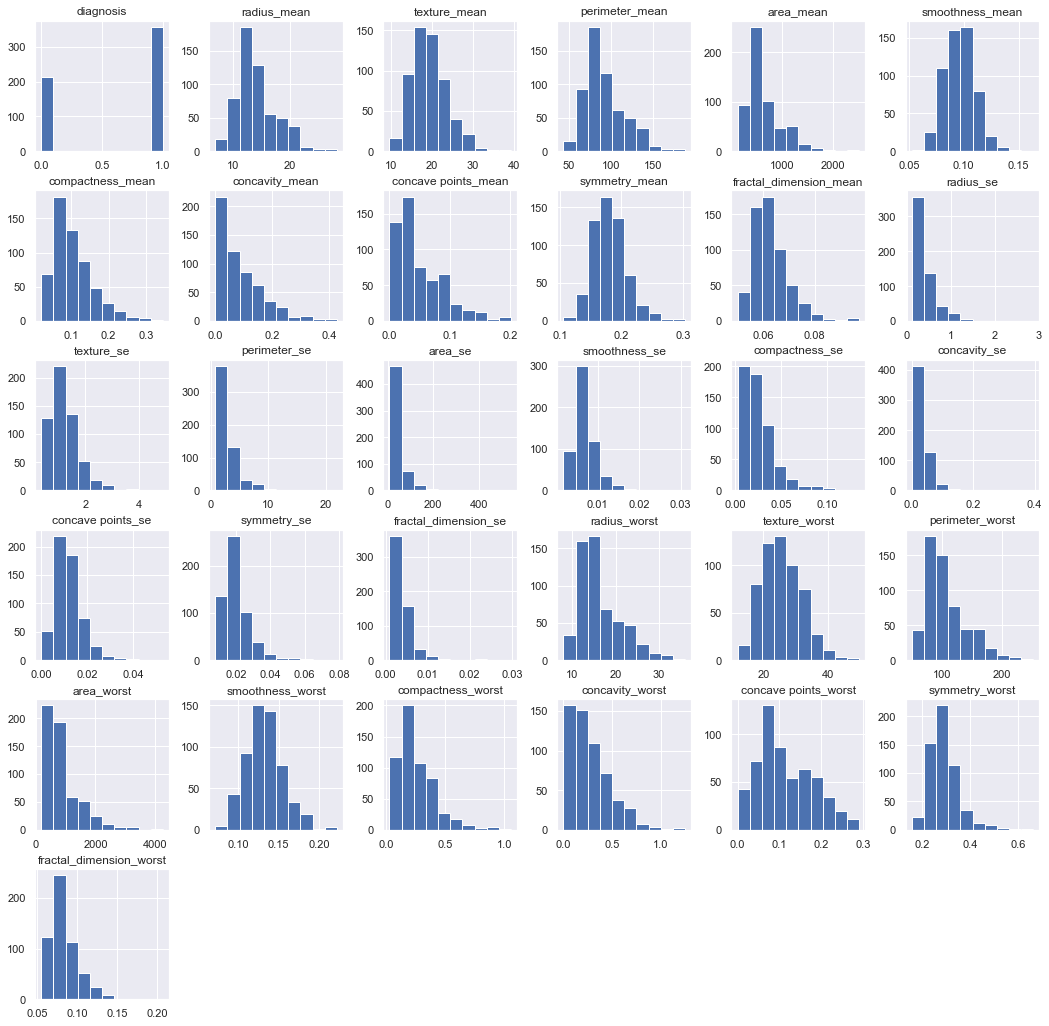

In [32]:
fig = data.hist(figsize = (18,18))


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


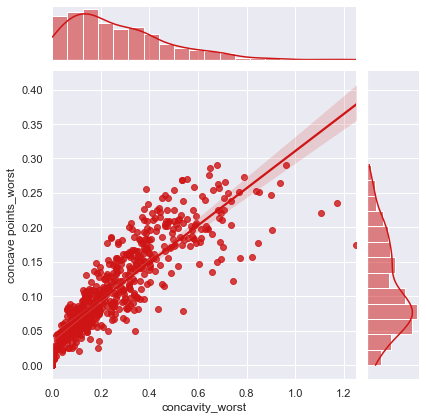

In [16]:
x = data.drop(['diagnosis'],axis = 1)
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")


<a id='Correlation'></a>
## 3.7 Correlation

In [17]:
 # check correlation
data_num = data.drop('diagnosis', axis=1)
corr = data_num.corr()


<AxesSubplot:>

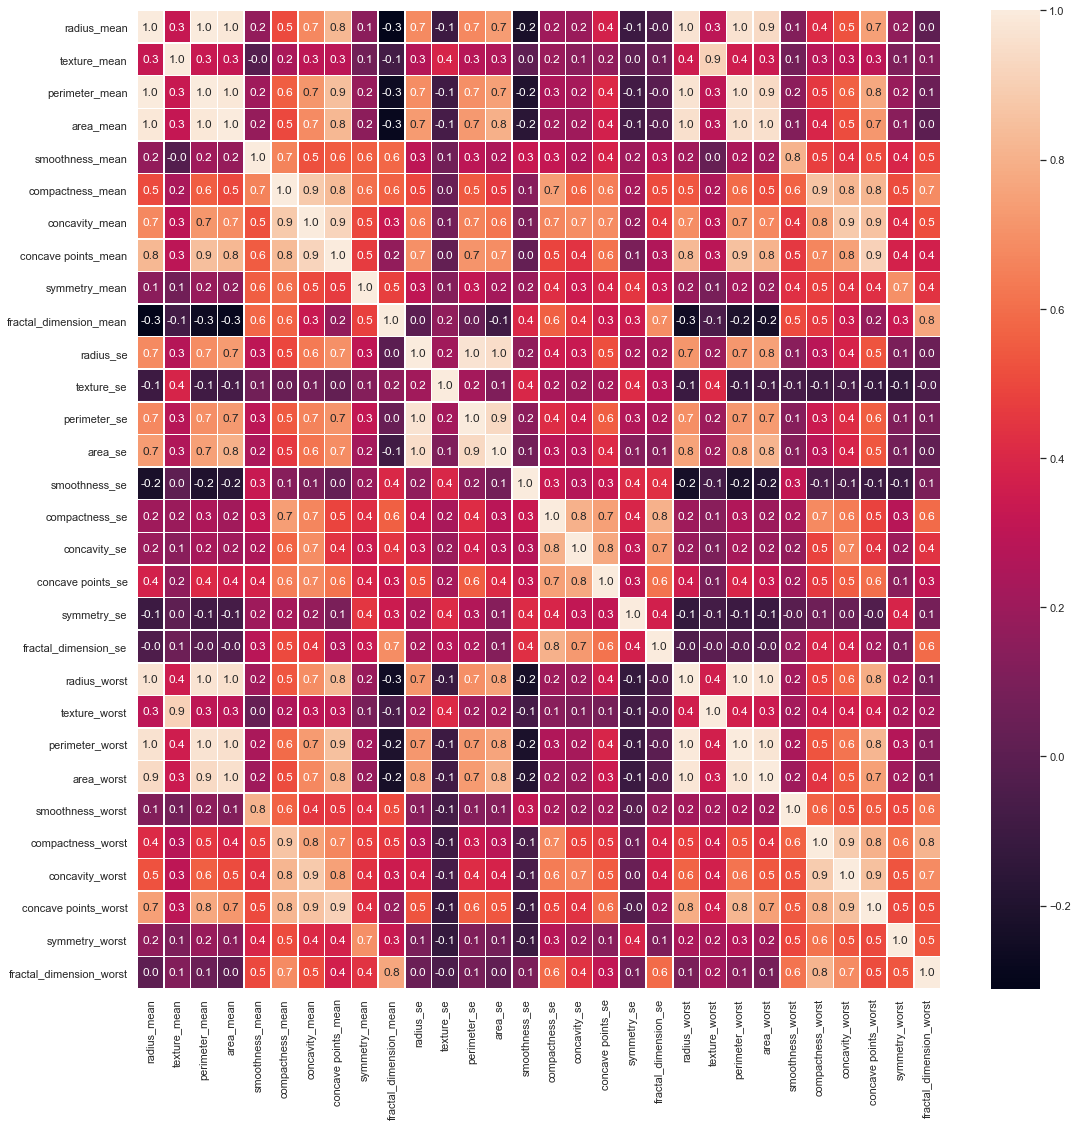

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

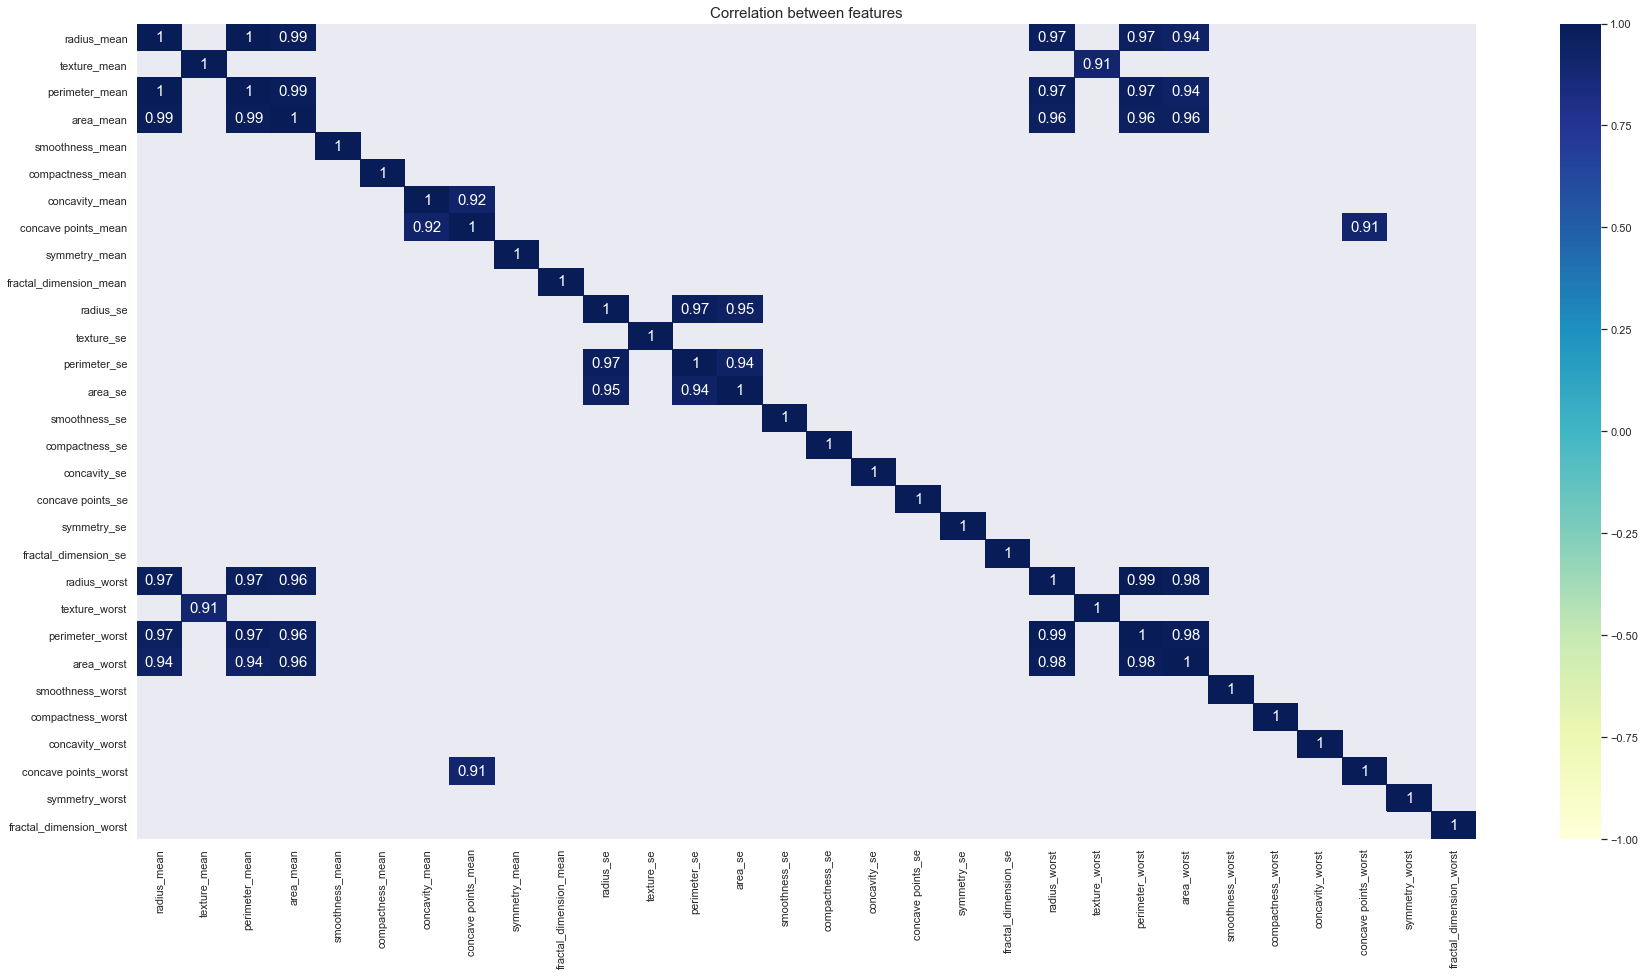

In [36]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

In [19]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
data_cleaned = data.drop(drop_list,axis = 1 )        
data_cleaned.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,0,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,0,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,0,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,0,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [22]:
# print the name of columns
data_cleaned.columns
data_cleaned.shape

(569, 17)

<AxesSubplot:>

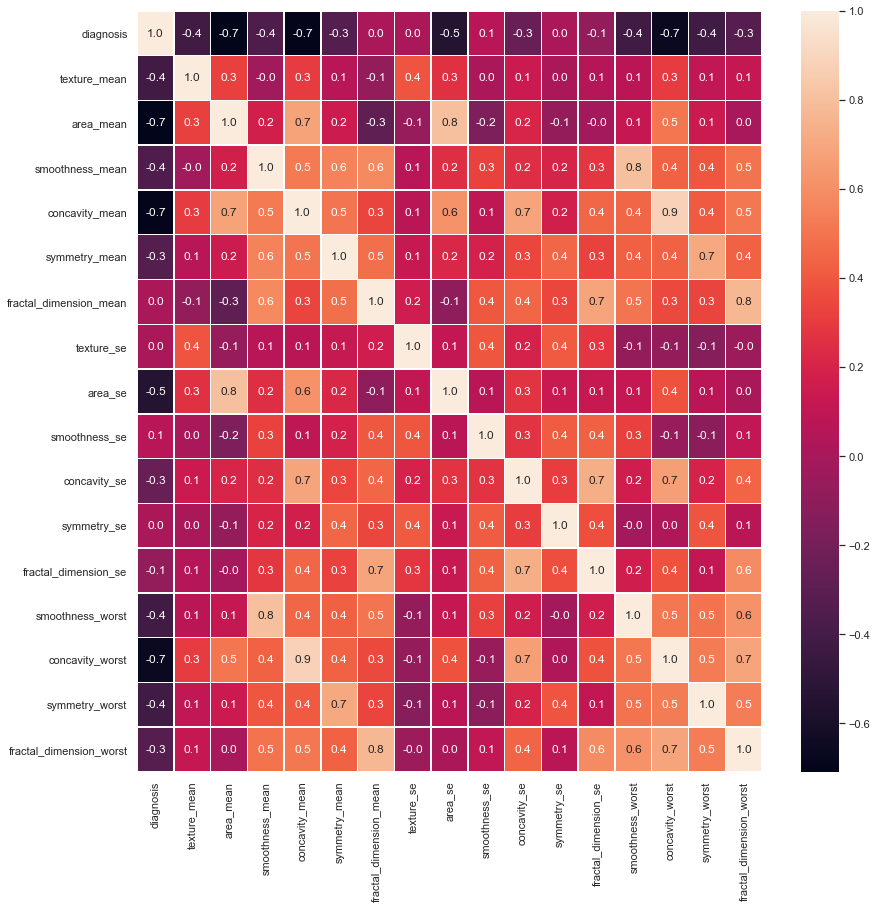

In [23]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data_cleaned.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<a id="feature_selection"> </a>
## 3.8 Feature Selection

In [25]:
#here we have 17 columns after removing the multi-colinear columns.
#and after feature selection we have reducted it to 16 columns
data_cleaned.shape


(569, 17)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = data_cleaned.drop(['diagnosis'],axis = 1)
y = data_cleaned['diagnosis']


In [27]:
x.shape

(569, 16)

In [30]:
x.head(3)

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758


In [32]:
select_feature = SelectKBest(chi2, k=5).fit(x,y)
print(select_feature)
print('****')
print(select_feature.scores_)
print('****')
#clf.feature_importances_  
X = select_feature.transform(x)
print(X) # Selected features are 'texture_mean' , 'area_mean','concavity_mean' , 'area_se' , 'concavity_worst' 
X



SelectKBest(k=5, score_func=<function chi2 at 0x0000020B1C40FB80>)
****
[9.38975081e+01 5.39916559e+04 1.49899264e-01 1.97123536e+01
 2.57379775e-01 7.43065536e-05 9.79353970e-03 8.75850471e+03
 3.26620664e-03 1.04471761e+00 8.03633831e-05 6.37136566e-03
 3.97365694e-01 3.95169151e+01 1.29886140e+00 2.31522407e-01]
****
[[1.038e+01 1.001e+03 3.001e-01 1.534e+02 7.119e-01]
 [1.777e+01 1.326e+03 8.690e-02 7.408e+01 2.416e-01]
 [2.125e+01 1.203e+03 1.974e-01 9.403e+01 4.504e-01]
 ...
 [2.808e+01 8.581e+02 9.251e-02 4.855e+01 3.403e-01]
 [2.933e+01 1.265e+03 3.514e-01 8.622e+01 9.387e-01]
 [2.454e+01 1.810e+02 0.000e+00 1.915e+01 0.000e+00]]


array([[1.038e+01, 1.001e+03, 3.001e-01, 1.534e+02, 7.119e-01],
       [1.777e+01, 1.326e+03, 8.690e-02, 7.408e+01, 2.416e-01],
       [2.125e+01, 1.203e+03, 1.974e-01, 9.403e+01, 4.504e-01],
       ...,
       [2.808e+01, 8.581e+02, 9.251e-02, 4.855e+01, 3.403e-01],
       [2.933e+01, 1.265e+03, 3.514e-01, 8.622e+01, 9.387e-01],
       [2.454e+01, 1.810e+02, 0.000e+00, 1.915e+01, 0.000e+00]])

In [33]:
dataframe = pd.DataFrame(X)

In [35]:
dataframe

,0,1,2,3,4
0,10.38,1001.0,0.30010,153.40,0.7119
1,17.77,1326.0,0.08690,74.08,0.2416
2,21.25,1203.0,0.19740,94.03,0.4504
3,20.38,386.1,0.24140,27.23,0.6869
4,14.34,1297.0,0.19800,94.44,0.4000
...,...,...,...,...,...
564,22.39,1479.0,0.24390,158.70,0.4107
565,28.25,1261.0,0.14400,99.04,0.3215
566,28.08,858.1,0.09251,48.55,0.3403
567,29.33,1265.0,0.35140,86.22,0.9387


In [36]:
mask = X.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

AttributeError: 'numpy.ndarray' object has no attribute 'get_support'

<a id="Ensemble_learning"> </a>
## 4. Ensemble Learning

<a id="meta_estimator"> </a>
## 4.1 Bagging meta-estimator

**1. Split the dataset set**

In [29]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (398, 5)
X_test  (171, 5)
y_train  (398,)
y_test  (171,)


**2. Build the model**

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# build the model
meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

# fit the model
meta_estimator.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

**3. Predict the values**

In [27]:
# predict the values
y_pred = meta_estimator.predict(X_test)

**4. Compute accuracy measures**

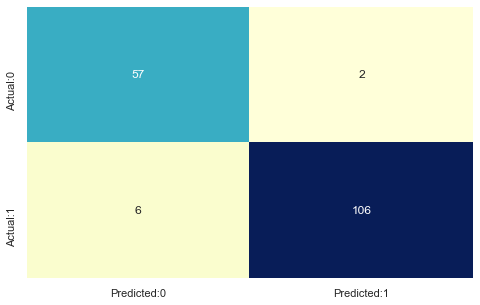

In [28]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [29]:
   # True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [30]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        59
           1       0.98      0.95      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



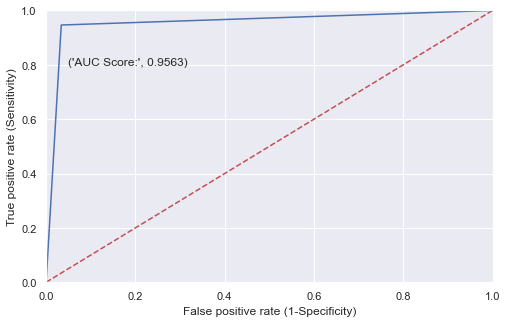

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

**5. Tabulate the results**

In [33]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Bagging_Meta_estimator = pd.Series({'Model': "Bagging Meta-estimator",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Bagging_Meta_estimator , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.956265,0.981481,0.946429,0.953216,0.963636


<a id="AdaBoost"> </a>
## 4.2 AdaBoost

**1. Build the model**

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_train, y_train)




AdaBoostClassifier(random_state=10)

**2. Do predictions on the test set**

In [35]:
# predict the values
y_pred_adaboost  = adaboost.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

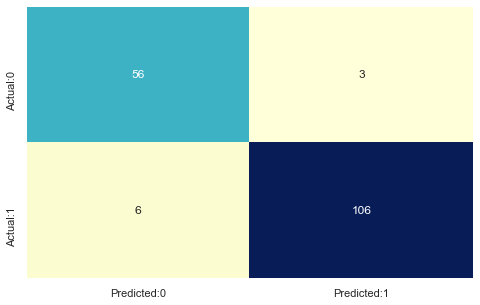

In [36]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [37]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [38]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_adaboost)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.97      0.95      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



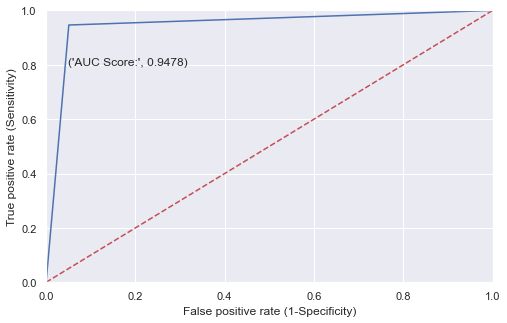

In [39]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adaboost)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_adaboost),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

**4. Tabulate the results**

In [40]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
adaboost_metrics = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_adaboost),
                 'Precision Score': metrics.precision_score(y_test, y_pred_adaboost),
                 'Recall Score': metrics.recall_score(y_test, y_pred_adaboost),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_adaboost),
                  'f1-score':metrics.f1_score(y_test, y_pred_adaboost)})



# appending our result table
result_tabulation = result_tabulation.append(adaboost_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.956265,0.981481,0.946429,0.953216,0.963636
1,AdaBoost,0.947791,0.972477,0.946429,0.947368,0.959276


<a id="XGBM"> </a>
## 4.3 XGBM

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a Ensemble learning model using XGB(extreme Gradient Boosting). We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a model using XGBM, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [42]:
#import xgboost classifier
from xgboost.sklearn import XGBClassifier

# build the model
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
# fit the model
xgbm.fit(X_train, y_train)




[18:36:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**2. Predict the values for the test set**

In [43]:
# predict the values
y_pred_xgbm  = xgbm.predict(X_test)

**3. Compute accuracy measures**

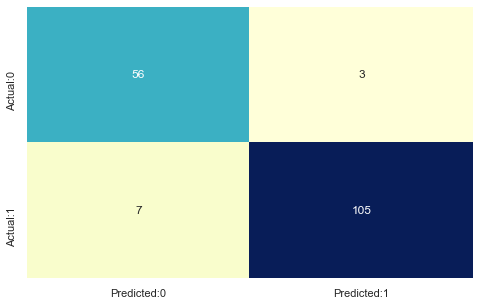

In [44]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgbm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [45]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]               

In [46]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_xgbm)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.97      0.94      0.95       112

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



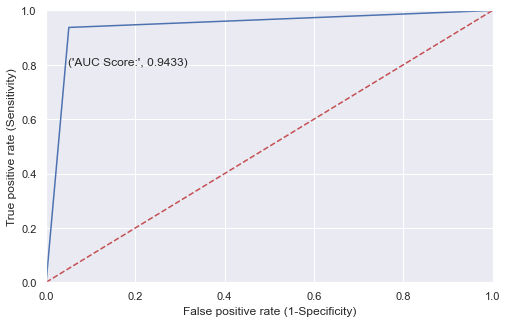

In [47]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbm)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_xgbm),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

**5. Tabulate the results**

In [48]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
xgbm_metrices = pd.Series({'Model': "XGBM",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_xgbm),
                 'Precision Score': metrics.precision_score(y_test, y_pred_xgbm),
                 'Recall Score': metrics.recall_score(y_test, y_pred_xgbm),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xgbm),

                  'f1-score':metrics.f1_score(y_test, y_pred_xgbm)})



# appending our result table
result_tabulation = result_tabulation.append(xgbm_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.956265,0.981481,0.946429,0.953216,0.963636
1,AdaBoost,0.947791,0.972477,0.946429,0.947368,0.959276
2,XGBM,0.943326,0.972222,0.937500,0.941520,0.954545


<a id="model_cmp"> </a>
## 5. Model Comparision

In [ ]:
result_tabulation